In [1]:
%matplotlib inline

import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
import pandas as pd
import missingno as msno
import os
from scipy import stats
from scipy.stats import pearsonr
sns.set(color_codes=True)
import statsmodels.api as sm  
from statsmodels.formula.api import ols
from sklearn import linear_model
%matplotlib inline
from sklearn.datasets import load_iris

In [2]:
#Agency AGYSUB TEXT
#Location LOC TEXT
#Age AGELVL TEXT
#Education Level EDLVL TEXT
#General Schedule & Equivalent Grade GSEGRD TEXT
#Length of Service LOSLVL TEXT
#Occupation OCC TEXT
#Occupation Category PATCO TEXT
#Pay Plan & Grade PPGRD TEXT
#Salary Level SALLVL TEXT
#STEM Occupations STEMOCC TEXT
#Supervisory Status SUPERVIS TEXT
#Type Appointment TOA TEXT
#Work Schedule WORKSCH TEXT
#Work Status WORKSTAT TEXT
#Date (e.g. 202109) DATECODE TEXT
#Employment EMPLOYMENT NUMERIC
#Average Salary SALARY NUMERIC
#Average Length of Service LOS NUMERIC

In [4]:
FACTDATA06= pd.read_table('FEC062021/FACTDATA_JUN2021.TXT', sep=",")
FACTDATA06

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


AGYSUB LOC AGELVL EDLVL GSEGRD LOSLVL   OCC  PATCO  PP  PPGRD SALLVL  \
0         AA00  11      F    13    NaN      F   340      2  ES  ES-**      R   
1         AA00  11      I    15    NaN      H   905      1  ES  ES-**      R   
2         AA00  11      E    15     15      E   905      1  99  GS-15      Q   
3         AA00  11      D    15     15      D   905      1  99  GS-15      N   
4         AA00  11      F    15     13      E   905      1  99  GS-13      K   
...        ...  ..    ...   ...    ...    ...   ...    ...  ..    ...    ...   
2188918   ZS00  11      I    01    NaN      A  0301      2  99  AD-00      Q   
2188919   ZS00  11      C    17    NaN      A  0301      2  99  AD-00      E   
2188920   ZU00  11      K    17    NaN      E  0301      2  99  AD-00      Q   
2188921   ZU00  11      E    17    NaN      D  0301      2  99  AD-00      K   
2188922   ZU00  11      C    13    NaN      B  0301      2  99  AD-00      F   

        STEMOCC SUPERVIS TOA WORKSCH  WORKSTAT  DATECODE  EMPLOYMENT  \
0          XXXX        2  50       F         1    202106           1   
1          XXXX        2  50       F         1    202106           1   
2          XXXX        2  30       F         1    202106           1   
3          XXXX        8  30       F         1    202106           1   
4          XXXX        8  30       F         1    202106           1   
...         ...      ...  ..     ...       ...       ...         ...   
2188918    XXXX        8  48       I         2    202106           1   
2188919    XXXX        8  48       F         2    202106           1   
2188920    XXXX        8  48       F         2    202106           1   
2188921    XXXX        8  38       F         1    202106           1   
2188922    XXXX        8  38       F         1    202106           1   

           SALARY   LOS  
0        181500.0  18.0  
1        181500.0  28.4  
2        172500.0  11.8  
3        144128.0   9.8  
4        114059.0  12.7  
...           ...   ...  
2188918  173074.0   0.3  
2188919   57000.0   0.1  
2188920  170800.0  14.1  
2188921  112930.0   8.0  
2188922   64682.0   2.8  

[2188923 rows x 20 columns]

In [5]:
FACTDATA09= pd.read_table('FEC092021/FACTDATA_SEP2021.TXT', sep=",")
FACTDATA09


/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


AGYSUB LOC AGELVL EDLVL GSEGRD LOSLVL   OCC  PATCO  PP  PPGRD SALLVL  \
0         AA00  11      F    13    NaN      F  0340      2  ES  ES-**      S   
1         AA00  11      I    15    NaN      H  0905      1  ES  ES-**      R   
2         AA00  11      E    15     15      E  0905      1  99  GS-15      Q   
3         AA00  11      E    15     15      E  0905      1  99  GS-15      N   
4         AA00  11      F    15     13      E  0905      1  99  GS-13      K   
...        ...  ..    ...   ...    ...    ...   ...    ...  ..    ...    ...   
2191006   ZS00  11      I    01    NaN      A  0301      2  99  AD-00      Q   
2191007   ZS00  11      C    17    NaN      A  0301      2  99  AD-00      E   
2191008   ZS00  11      D    04    NaN      B  0301      2  99  AD-00      G   
2191009   ZS00  11      C    04    NaN      A  0301      2  99  AD-00      D   
2191010   ZU00  11      K    17    NaN      E  0301      2  99  AD-00      Q   

        STEMOCC SUPERVIS TOA WORKSCH  WORKSTAT  DATECODE  EMPLOYMENT  \
0          XXXX        2  50       F         1    202109           1   
1          XXXX        2  50       F         1    202109           1   
2          XXXX        2  30       F         1    202109           1   
3          XXXX        8  30       F         1    202109           1   
4          XXXX        8  30       F         1    202109           1   
...         ...      ...  ..     ...       ...       ...         ...   
2191006    XXXX        8  48       I         2    202109           1   
2191007    XXXX        8  48       F         2    202109           1   
2191008    XXXX        8  48       F         2    202109           1   
2191009    XXXX        8  48       F         2    202109           1   
2191010    XXXX        8  48       F         2    202109           1   

           SALARY   LOS  
0        192500.0  18.3  
1        187000.0  28.7  
2        172500.0  12.0  
3        144128.0  10.0  
4        114059.0  12.9  
...           ...   ...  
2191006  173074.0   0.6  
2191007   57000.0   0.3  
2191008   75500.0   2.7  
2191009   41000.0   0.1  
2191010  170800.0  14.3  

[2191011 rows x 20 columns]

In [6]:
FACTDATA = pd.concat ([FACTDATA06,FACTDATA09])
print(FACTDATA)


        AGYSUB LOC AGELVL EDLVL GSEGRD LOSLVL   OCC  PATCO  PP  PPGRD SALLVL  \
0         AA00  11      F    13    NaN      F   340      2  ES  ES-**      R   
1         AA00  11      I    15    NaN      H   905      1  ES  ES-**      R   
2         AA00  11      E    15     15      E   905      1  99  GS-15      Q   
3         AA00  11      D    15     15      D   905      1  99  GS-15      N   
4         AA00  11      F    15     13      E   905      1  99  GS-13      K   
...        ...  ..    ...   ...    ...    ...   ...    ...  ..    ...    ...   
2191006   ZS00  11      I    01    NaN      A  0301      2  99  AD-00      Q   
2191007   ZS00  11      C    17    NaN      A  0301      2  99  AD-00      E   
2191008   ZS00  11      D    04    NaN      B  0301      2  99  AD-00      G   
2191009   ZS00  11      C    04    NaN      A  0301      2  99  AD-00      D   
2191010   ZU00  11      K    17    NaN      E  0301      2  99  AD-00      Q   

        STEMOCC SUPERVIS TOA WORKSCH  W

In [7]:
FACTDATA .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4379934 entries, 0 to 2191010
Data columns (total 20 columns):
 #   Column      Dtype  
---  ------      -----  
 0   AGYSUB      object 
 1   LOC         object 
 2   AGELVL      object 
 3   EDLVL       object 
 4   GSEGRD      object 
 5   LOSLVL      object 
 6   OCC         object 
 7   PATCO       int64  
 8   PP          object 
 9   PPGRD       object 
 10  SALLVL      object 
 11  STEMOCC     object 
 12  SUPERVIS    object 
 13  TOA         object 
 14  WORKSCH     object 
 15  WORKSTAT    int64  
 16  DATECODE    int64  
 17  EMPLOYMENT  int64  
 18  SALARY      float64
 19  LOS         float64
dtypes: float64(2), int64(4), object(14)
memory usage: 701.7+ MB


In [8]:
#Missing data 
FACTDATA.isnull().sum()

AGYSUB              0
LOC                 0
AGELVL              0
EDLVL            9481
GSEGRD        1281870
LOSLVL              0
OCC                 0
PATCO               0
PP                  0
PPGRD               0
SALLVL              0
STEMOCC             0
SUPERVIS            0
TOA                 0
WORKSCH             0
WORKSTAT            0
DATECODE            0
EMPLOYMENT          0
SALARY         588457
LOS                37
dtype: int64

In [9]:
#Missing data in %
FACTDATA.isnull().sum()/(len(FACTDATA))*100

AGYSUB         0.000000
LOC            0.000000
AGELVL         0.000000
EDLVL          0.216464
GSEGRD        29.266879
LOSLVL         0.000000
OCC            0.000000
PATCO          0.000000
PP             0.000000
PPGRD          0.000000
SALLVL         0.000000
STEMOCC        0.000000
SUPERVIS       0.000000
TOA            0.000000
WORKSCH        0.000000
WORKSTAT       0.000000
DATECODE       0.000000
EMPLOYMENT     0.000000
SALARY        13.435294
LOS            0.000845
dtype: float64

<AxesSubplot:>

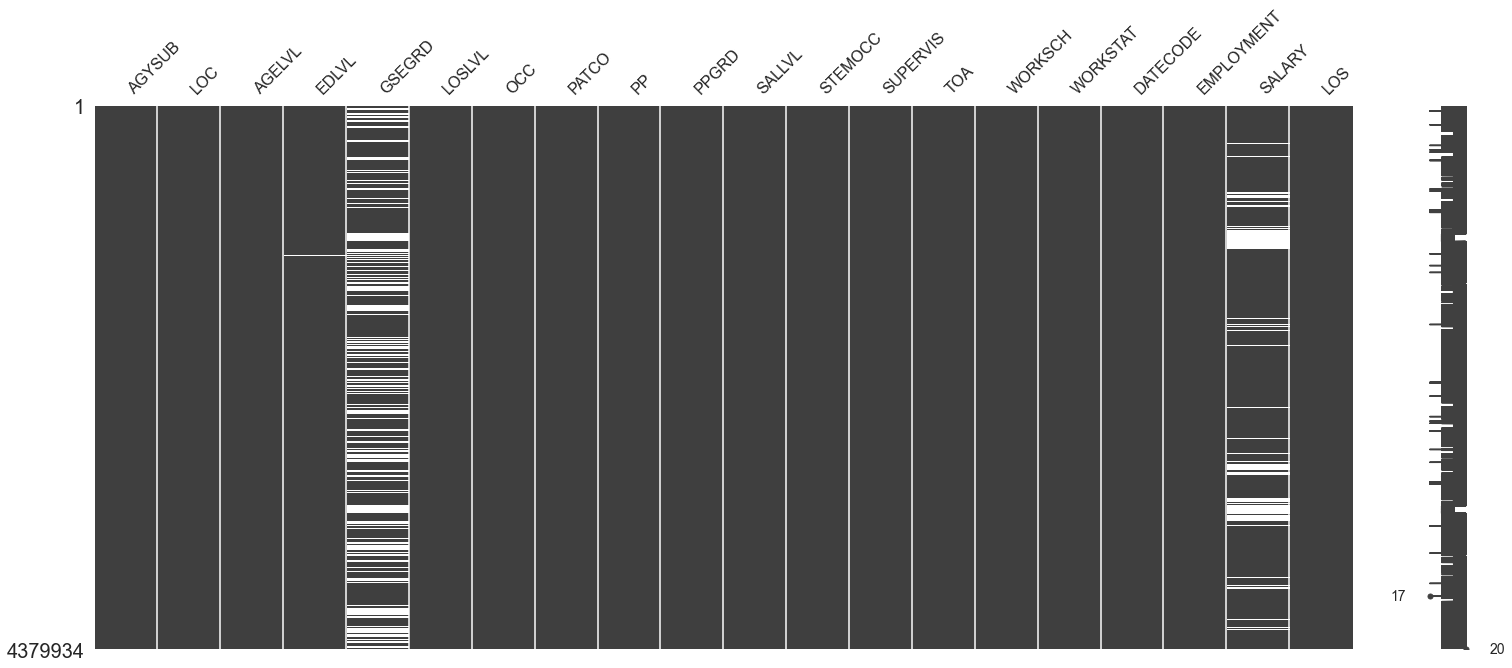

In [10]:
#Distribution of missing data
msno.matrix(FACTDATA)

In [11]:
#Count data by category Agency 202106
FACTDATA_by_Agency06 = FACTDATA06.groupby("AGYSUB")["SALARY","LOS","GSEGRD","EDLVL" ].count()
FACTDATA_by_Agency06

<ipython-input-11-339367a295cc>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  FACTDATA_by_Agency06 = FACTDATA06.groupby("AGYSUB")["SALARY","LOS","GSEGRD","EDLVL" ].count()


SALARY  LOS  GSEGRD  EDLVL
AGYSUB                            
AA00        11   11       8     11
AB00        78   78      73     78
AF02        20   30      29     30
AF03       249  252     251    252
AF06       557  557     554    557
...        ...  ...     ...    ...
WX00         4    7       0      7
ZL00        48   48       0     48
ZP00        21   27       0     27
ZS00        28   28       0     28
ZU00         3    3       0      3

[537 rows x 4 columns]

In [12]:
#Count data by category Agency 202109
FACTDATA_by_Agency09 = FACTDATA09.groupby("AGYSUB")["SALARY","LOS","GSEGRD","EDLVL" ].count()
FACTDATA_by_Agency09

<ipython-input-12-5881b01ffd0d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  FACTDATA_by_Agency09 = FACTDATA09.groupby("AGYSUB")["SALARY","LOS","GSEGRD","EDLVL" ].count()


SALARY  LOS  GSEGRD  EDLVL
AGYSUB                            
AA00        13   13      10     13
AB00        76   76      72     76
AF02        18   28      27     28
AF03       238  241     240    241
AF06       552  553     550    553
...        ...  ...     ...    ...
WX00         4    7       0      7
ZL00        47   47       0     47
ZP00        23   31       0     31
ZS00        29   29       0     29
ZU00         1    1       0      1

[537 rows x 4 columns]

In [13]:
#Minssing data group by category Agency 202106 and 202109.
FACTDATA_by_Agency_N= FACTDATA.groupby(['AGYSUB','DATECODE'])["SALARY","GSEGRD","EDLVL","LOS"].apply(lambda x: x.isnull().sum())

FACTDATA_by_Agency_N


<ipython-input-13-e809ddce582e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  FACTDATA_by_Agency_N= FACTDATA.groupby(['AGYSUB','DATECODE'])["SALARY","GSEGRD","EDLVL","LOS"].apply(lambda x: x.isnull().sum())


SALARY  GSEGRD  EDLVL  LOS
AGYSUB DATECODE                            
AA00   202106         0       3      0    0
       202109         0       3      0    0
AB00   202106         0       5      0    0
       202109         0       4      0    0
AF02   202106        10       1      0    0
...                 ...     ...    ...  ...
ZP00   202109         8      31      0    0
ZS00   202106         0      28      0    0
       202109         0      29      0    0
ZU00   202106         0       3      0    0
       202109         0       1      0    0

[1074 rows x 4 columns]

In [14]:
#Missing data in % on Education level, Length of Service, Average Salary and General Schedule & Equivalent Grade,
#group by Agency and date. 
FACTDATA_by_Agency_M= FACTDATA.groupby(['AGYSUB'])["SALARY","GSEGRD","EDLVL","LOS" ].apply(lambda x: x.isnull().sum()/(len(FACTDATA))*100)


FACTDATA_by_Agency_Msum=FACTDATA_by_Agency_M.eval('Sum = SALARY +GSEGRD+EDLVL+ LOS')
print(FACTDATA_by_Agency_Msum)




<ipython-input-14-4c00c29cca03>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  FACTDATA_by_Agency_M= FACTDATA.groupby(['AGYSUB'])["SALARY","GSEGRD","EDLVL","LOS" ].apply(lambda x: x.isnull().sum()/(len(FACTDATA))*100)


          SALARY    GSEGRD  EDLVL  LOS       Sum
AGYSUB                                          
AA00    0.000000  0.000137    0.0  0.0  0.000137
AB00    0.000000  0.000205    0.0  0.0  0.000205
AF02    0.000457  0.000046    0.0  0.0  0.000502
AF03    0.000137  0.000046    0.0  0.0  0.000183
AF06    0.000023  0.000137    0.0  0.0  0.000160
...          ...       ...    ...  ...       ...
WX00    0.000137  0.000320    0.0  0.0  0.000457
ZL00    0.000000  0.002169    0.0  0.0  0.002169
ZP00    0.000320  0.001324    0.0  0.0  0.001644
ZS00    0.000000  0.001301    0.0  0.0  0.001301
ZU00    0.000000  0.000091    0.0  0.0  0.000091

[541 rows x 5 columns]


In [15]:
FACTDATA_by_Agency_MSort=FACTDATA_by_Agency_Msum.sort_values(by=['Sum'])

In [16]:
pd.set_option("display.max_rows",None)

FACTDATA_by_Agency_MSortsum=FACTDATA_by_Agency_MSort["Sum"]

print(FACTDATA_by_Agency_MSortsum)


AGYSUB
HU06    0.000000
HUKA    0.000000
AF2F    0.000000
AF2H    0.000000
AF2K    0.000000
HU10    0.000000
HU09    0.000000
HU08    0.000000
AF2S    0.000000
AF2T    0.000000
EDET    0.000000
HU07    0.000000
HU05    0.000000
HU04    0.000000
HU03    0.000000
HU02    0.000000
HU01    0.000000
HE31    0.000000
AF1Q    0.000000
HUUU    0.000000
AF20    0.000000
HUXX    0.000000
VAKB    0.000000
ARXK    0.000000
VAGE    0.000000
VAGD    0.000000
VAAI    0.000000
AF0U    0.000000
VA**    0.000000
ARXX    0.000000
VABD    0.000000
HW00    0.000000
NV33    0.000023
AF16    0.000023
ARXR    0.000023
AG32    0.000023
VABH    0.000023
DO00    0.000023
GS04    0.000023
GS10    0.000046
ARXF    0.000046
DD74    0.000046
AG15    0.000046
FI00    0.000046
ARXP    0.000046
EDEJ    0.000046
CM62    0.000046
CF00    0.000046
DJ14    0.000046
GS20    0.000046
GS32    0.000046
AGAO    0.000046
HB02    0.000046
VAJC    0.000046
AF3G    0.000046
VABK    0.000046
VABG    0.000046
AP00    0.000046
AF34   

In [24]:
#select data that has no missing value in Agency Category which contains 32 agencies.
FACTDATA_setdata = FACTDATA.loc[FACTDATA['AGYSUB'].isin(['HU06','HUKA','AF2F','AF2H','HU10','HU09',
                                                         'HU08','AF2S','AF2T','EDET','HU07',
                                                         'HU05','HU04','HU03','HU02','HU01',
                                                         'HE31','AF1Q', 'HUUU','AF20','HUXX',
                                                         'VAKB ','VAGE','VAGD','VAAI','AF0U','VA**',
                                                        'ARXX','VABD','HW00','AF2K','ARXK '])]
FACTDATA_setdata

AGYSUB LOC AGELVL EDLVL GSEGRD LOSLVL   OCC  PATCO  PP  PPGRD SALLVL  \
39092     AF0U  24      K    08     13      D  2210      2  99  GG-13      L   
134801    AF1Q  40      J    10     13      G  1670      2  99  GS-13      K   
134802    AF1Q  40      E    13     12      E  0560      2  99  GS-12      I   
134803    AF1Q  40      K    04     13      J  2152      2  99  GS-13      L   
134804    AF1Q  40      I    04     12      F  1670      2  99  GS-12      I   
134805    AF1Q  40      G    07     12      G  2210      2  99  GS-12      I   
134806    AF1Q  40      J    04     12      F  1670      2  99  GS-12      I   
134807    AF1Q  40      I    13     13      I  1361      2  99  GS-13      K   
134808    AF1Q  40      I    10     13      G  2150      2  99  GS-13      K   
134809    AF1Q  40      J    14     13      H  1372      1  99  GS-13      K   
134810    AF1Q  40      G    10     12      E  0343      2  99  GS-12      H   
134811    AF1Q  40      J    13     12      F  1670      2  99  GS-12      I   
134812    AF1Q  40      I    13     13      B  1361      2  99  GS-13      K   
134813    AF1Q  40      H    17     14      G  1670      2  99  GS-14      L   
134814    AF1Q  40      K    13     13      H  0346      2  99  GS-13      K   
134815    AF1Q  40      J    17     15      F  2152      2  99  GS-15      Q   
134816    AF1Q  40      I    10     12      F  2210      2  99  GS-12      I   
134817    AF1Q  40      I    10     12      F  2210      2  99  GS-12      I   
134818    AF1Q  40      I    08     13      I  1670      2  99  GS-13      M   
134819    AF1Q  40      J    17     14      E  1361      2  99  GS-14      M   
134820    AF1Q  40      I    10     12      F  2210      2  99  GS-12      I   
134821    AF1Q  40      J    13     13      J  0346      2  99  GS-13      K   
134822    AF1Q  40      K    04     13      H  1372      1  99  GS-13      K   
134823    AF1Q  40      I    04     13      E  1361      2  99  GS-13      K   
134824    AF1Q  40      J    04     13      F  2152      2  99  GS-13      K   
134825    AF1Q  40      J    13     13      G  1670      2  99  GS-13      K   
134826    AF1Q  40      I    17     11      I  2210      2  99  GS-11      H   
134827    AF1Q  40      F    13     12      G  2210      2  99  GS-12      H   
134828    AF1Q  40      H    04     12      E  2210      2  99  GS-12      I   
134829    AF1Q  40      I    11     13      G  1670      2  99  GS-13      K   
134830    AF1Q  40      E    17     12      F  0346      2  99  GS-12      I   
134831    AF1Q  40      I    13     11      F  2210      2  99  GS-11      H   
134832    AF1Q  40      K    17     15      E  2152      2  99  GS-15      Q   
134833    AF1Q  40      F    12     13      F  2152      2  99  GS-13      L   
134834    AF1Q  40      I    13     14      J  2210      2  99  GS-14      N   
134835    AF1Q  40      I    04     13      J  0501      2  99  GS-13      K   
134836    AF1Q  40      H    17     13      E  2152      2  99  GS-13      L   
134837    AF1Q  40      I    04     13      D  2152      2  99  GS-13      L   
134838    AF1Q  40      I    13     11      E  0301      2  99  GS-11      H   
134839    AF1Q  40      H    17     14      H  2152      2  99  GS-14      N   
134840    AF1Q  40      I    17     12      E  1670      2  99  GS-12      I   
134841    AF1Q  40      E    04     12      E  2210      2  99  GS-12      J   
134842    AF1Q  40      I    04     13      E  2152      2  99  GS-13      L   
134843    AF1Q  40      I    17     13      E  2152      2  99  GS-13      K   
134844    AF1Q  51      K    13     13      D  0343      2  99  GS-13      M   
134845    AF1Q  40      H    04     12      D  1670      2  99  GS-12      H   
134846    AF1Q  40      H    17     13      D  2152      2  99  GS-13      K   
134847    AF1Q  40      H    17     12      D  0560      2  99  GS-12      H   
134848    AF1Q  40      G    17     13      D  0301      2  99  GS-13      I   
134849  

In [26]:
#Recheck the dataset, to make sure we only keep selected rows on PATCO
FACTDATA_by_Agency_M_test= FACTDATA_setdata.groupby(['AGYSUB','DATECODE'])["SALARY","GSEGRD","EDLVL","LOS" ].apply(lambda x: x.isnull().sum()/(len(FACTDATA))*100)

FACTDATA_by_Agency_M_test

<ipython-input-26-2dddc6ba5e5f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  FACTDATA_by_Agency_M_test= FACTDATA_setdata.groupby(['AGYSUB','DATECODE'])["SALARY","GSEGRD","EDLVL","LOS" ].apply(lambda x: x.isnull().sum()/(len(FACTDATA))*100)


SALARY  GSEGRD  EDLVL  LOS
AGYSUB DATECODE                            
AF0U   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
AF1Q   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
AF20   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
AF2F   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
AF2H   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
AF2K   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
AF2S   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
AF2T   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
ARXX   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
EDET   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
HE31   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
HU01   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
HU02   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
HU03   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
HU04   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
HU05   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
HU06   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
HU07   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
HU08   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
HU09   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
HU10   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
HUKA   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
HUUU   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
HUXX   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
HW00   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
VA**   202109       0.0     0.0    0.0  0.0
VAAI   202109       0.0     0.0    0.0  0.0
VABD   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
VAGD   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0
VAGE   202106       0.0     0.0    0.0  0.0
       202109       0.0     0.0    0.0  0.0

In [27]:
#Missing data 
FACTDATA_setdata.isnull().sum()

AGYSUB        0
LOC           0
AGELVL        0
EDLVL         0
GSEGRD        0
LOSLVL        0
OCC           0
PATCO         0
PP            0
PPGRD         0
SALLVL        0
STEMOCC       0
SUPERVIS      0
TOA           0
WORKSCH       0
WORKSTAT      0
DATECODE      0
EMPLOYMENT    0
SALARY        0
LOS           0
dtype: int64

In [28]:
FACTDATA_setdata.isnull().sum()/(len(FACTDATA))*100

AGYSUB        0.0
LOC           0.0
AGELVL        0.0
EDLVL         0.0
GSEGRD        0.0
LOSLVL        0.0
OCC           0.0
PATCO         0.0
PP            0.0
PPGRD         0.0
SALLVL        0.0
STEMOCC       0.0
SUPERVIS      0.0
TOA           0.0
WORKSCH       0.0
WORKSTAT      0.0
DATECODE      0.0
EMPLOYMENT    0.0
SALARY        0.0
LOS           0.0
dtype: float64